In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df_1 = pd.read_csv('data/address_data_k.csv',index_col=0)
print(df_1.shape)
print(df_1.head())

(9841, 50)
   Index                                     Address  FLAG  \
0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   

   Avg min between sent tnx  Avg min between received tnx  \
0                    844.26                       1093.71   
1                  12709.07                       2958.44   
2                 246194.54                       2434.02   
3                  10219.60                      15785.09   
4                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729

In [11]:
df_2 = pd.read_csv('data/transaction_dataset.csv',index_col=0)
#df_2.drop('Index',axis=1,inplace=True)
print(df_2.shape)
print(df_2.head())
f_txn = len(df_2[df_2['FLAG'] == 1])
print('initial amount of fraud is ', f_txn, ' which is ', (f_txn/len(df_2))*100, ' % of the original dataset')

(15741, 17)
                                            FLAG  Avg min between sent tnx  \
Address                                                                      
0x26a40e8dbdb0dee17d7036fcc0a2ae3fecf4800d     1                   2663.33   
0x9f26ae5cd245bfeeb5926d61497550f79d9c6c1c     1                   1187.30   
0x2073d860b9b9e19f4d20eb0fe741fb5fe7fe6bb0     1                      0.00   
0xbceaa0040764009fdcff407e82ad1f06465fd2c4     1                      2.50   
0x03b70dc31abf9cf6c1cf80bfeeb322e8d3dbb4ca     1                   8717.96   

                                            Avg min between received tnx  \
Address                                                                    
0x26a40e8dbdb0dee17d7036fcc0a2ae3fecf4800d                      21974.49   
0x9f26ae5cd245bfeeb5926d61497550f79d9c6c1c                          0.00   
0x2073d860b9b9e19f4d20eb0fe741fb5fe7fe6bb0                          0.00   
0xbceaa0040764009fdcff407e82ad1f06465fd2c4                   

In [ ]:
df_combine = pd.concat([df_1,df_2])
print(df_combine.shape)
print(df_combine.head())
f_txn = len(df_combine[df_combine['FLAG'] == 1])
print('current amount of fraud is now ', f_txn, ' which is ', (f_txn/len(df_combine))*100, ' % of the original dataset')

(15741, 49)
                                      Address  FLAG  Avg min between sent tnx  \
0  0x26a40e8dbdb0dee17d7036fcc0a2ae3fecf4800d     1               2663.328319   
1  0x9f26ae5cd245bfeeb5926d61497550f79d9c6c1c     1               1187.302381   
2  0x2073d860b9b9e19f4d20eb0fe741fb5fe7fe6bb0     1                  0.000000   
3  0xbceaa0040764009fdcff407e82ad1f06465fd2c4     1                  2.500000   
4  0x03b70dc31abf9cf6c1cf80bfeeb322e8d3dbb4ca     1               8717.958120   

   Avg min between received tnx  Time Diff between first and last (Mins)  \
0                  21974.488095                            621645.100000   
1                      0.000000                             33244.466667   
2                      0.000000                                 0.000000   
3                      0.000000                            307749.633333   
4                  14350.644928                            341014.550000   

   Sent tnx  Received Tnx  Number of Created

In [ ]:
df_combine = df_combine.dropna()
print(df_combine.shape)

(12142, 49)


In [ ]:
df_combine.nunique()

Address                                                 11912
FLAG                                                        2
Avg min between sent tnx                                 4913
Avg min between received tnx                             5887
Time Diff between first and last (Mins)                  7359
Sent tnx                                                  640
Received Tnx                                              725
Number of Created Contracts                                29
Unique Received From Addresses                            259
Unique Sent To Addresses                                  255
min value received                                       4461
max value received                                       6151
avg val received                                         6482
min val sent                                             4418
max val sent                                             6376
avg val sent                                             5568
min valu

In [ ]:
# dropping columns that have nunique values < 5 <- not useful features
constant_columns = [' ERC20 uniq sent addr.1', ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract', ' ERC20 max val sent contract', ' ERC20 avg val sent contract']
df_combine.drop(constant_columns,axis=1,inplace=True)
print(df_combine.shape)

(12142, 43)


In [ ]:
# double check
df_combine.nunique()
# Interesting note : there are some addresses with more than 1 row

Address                                                 11912
FLAG                                                        2
Avg min between sent tnx                                 4913
Avg min between received tnx                             5887
Time Diff between first and last (Mins)                  7359
Sent tnx                                                  640
Received Tnx                                              725
Number of Created Contracts                                29
Unique Received From Addresses                            259
Unique Sent To Addresses                                  255
min value received                                       4461
max value received                                       6151
avg val received                                         6482
min val sent                                             4418
max val sent                                             6376
avg val sent                                             5568
min valu

https://link.springer.com/chapter/10.1007/978-3-030-34223-4_2
Following this research article, I will try to apply the 3 classifiers mentioned
Namely, Random Forest, Support Vector Machines and XGBoost Classifiers

In [ ]:
# First performing random forest
print('Random forest can only classify numerical columns, hence further processing needs to be done')
df_combine_forest = df_combine.select_dtypes(include='number')
print(df_combine_forest.shape)
print('3 columns have been dropped')

Random forest can only classify numerical columns, hence further processing needs to be done
(12142, 40)
3 columns have been dropped


In [ ]:
X = df_combine_forest.drop('FLAG',axis=1)
print(x.shape)
y = df_combine_forest['FLAG'] # y_column needs to be 1d
print(y.shape)

(12142, 39)
(12142,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8499, 39), (3643, 39), (8499,), (3643,))

In [ ]:
TOTAL_TREES = 100
classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=TOTAL_TREES)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
# Hyperparameter tuning for random forest using gridsearchcv to fit the data

rf = RandomForestClassifier(random_state=42,n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
print(rf_best)

0.9837626564750194
RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)


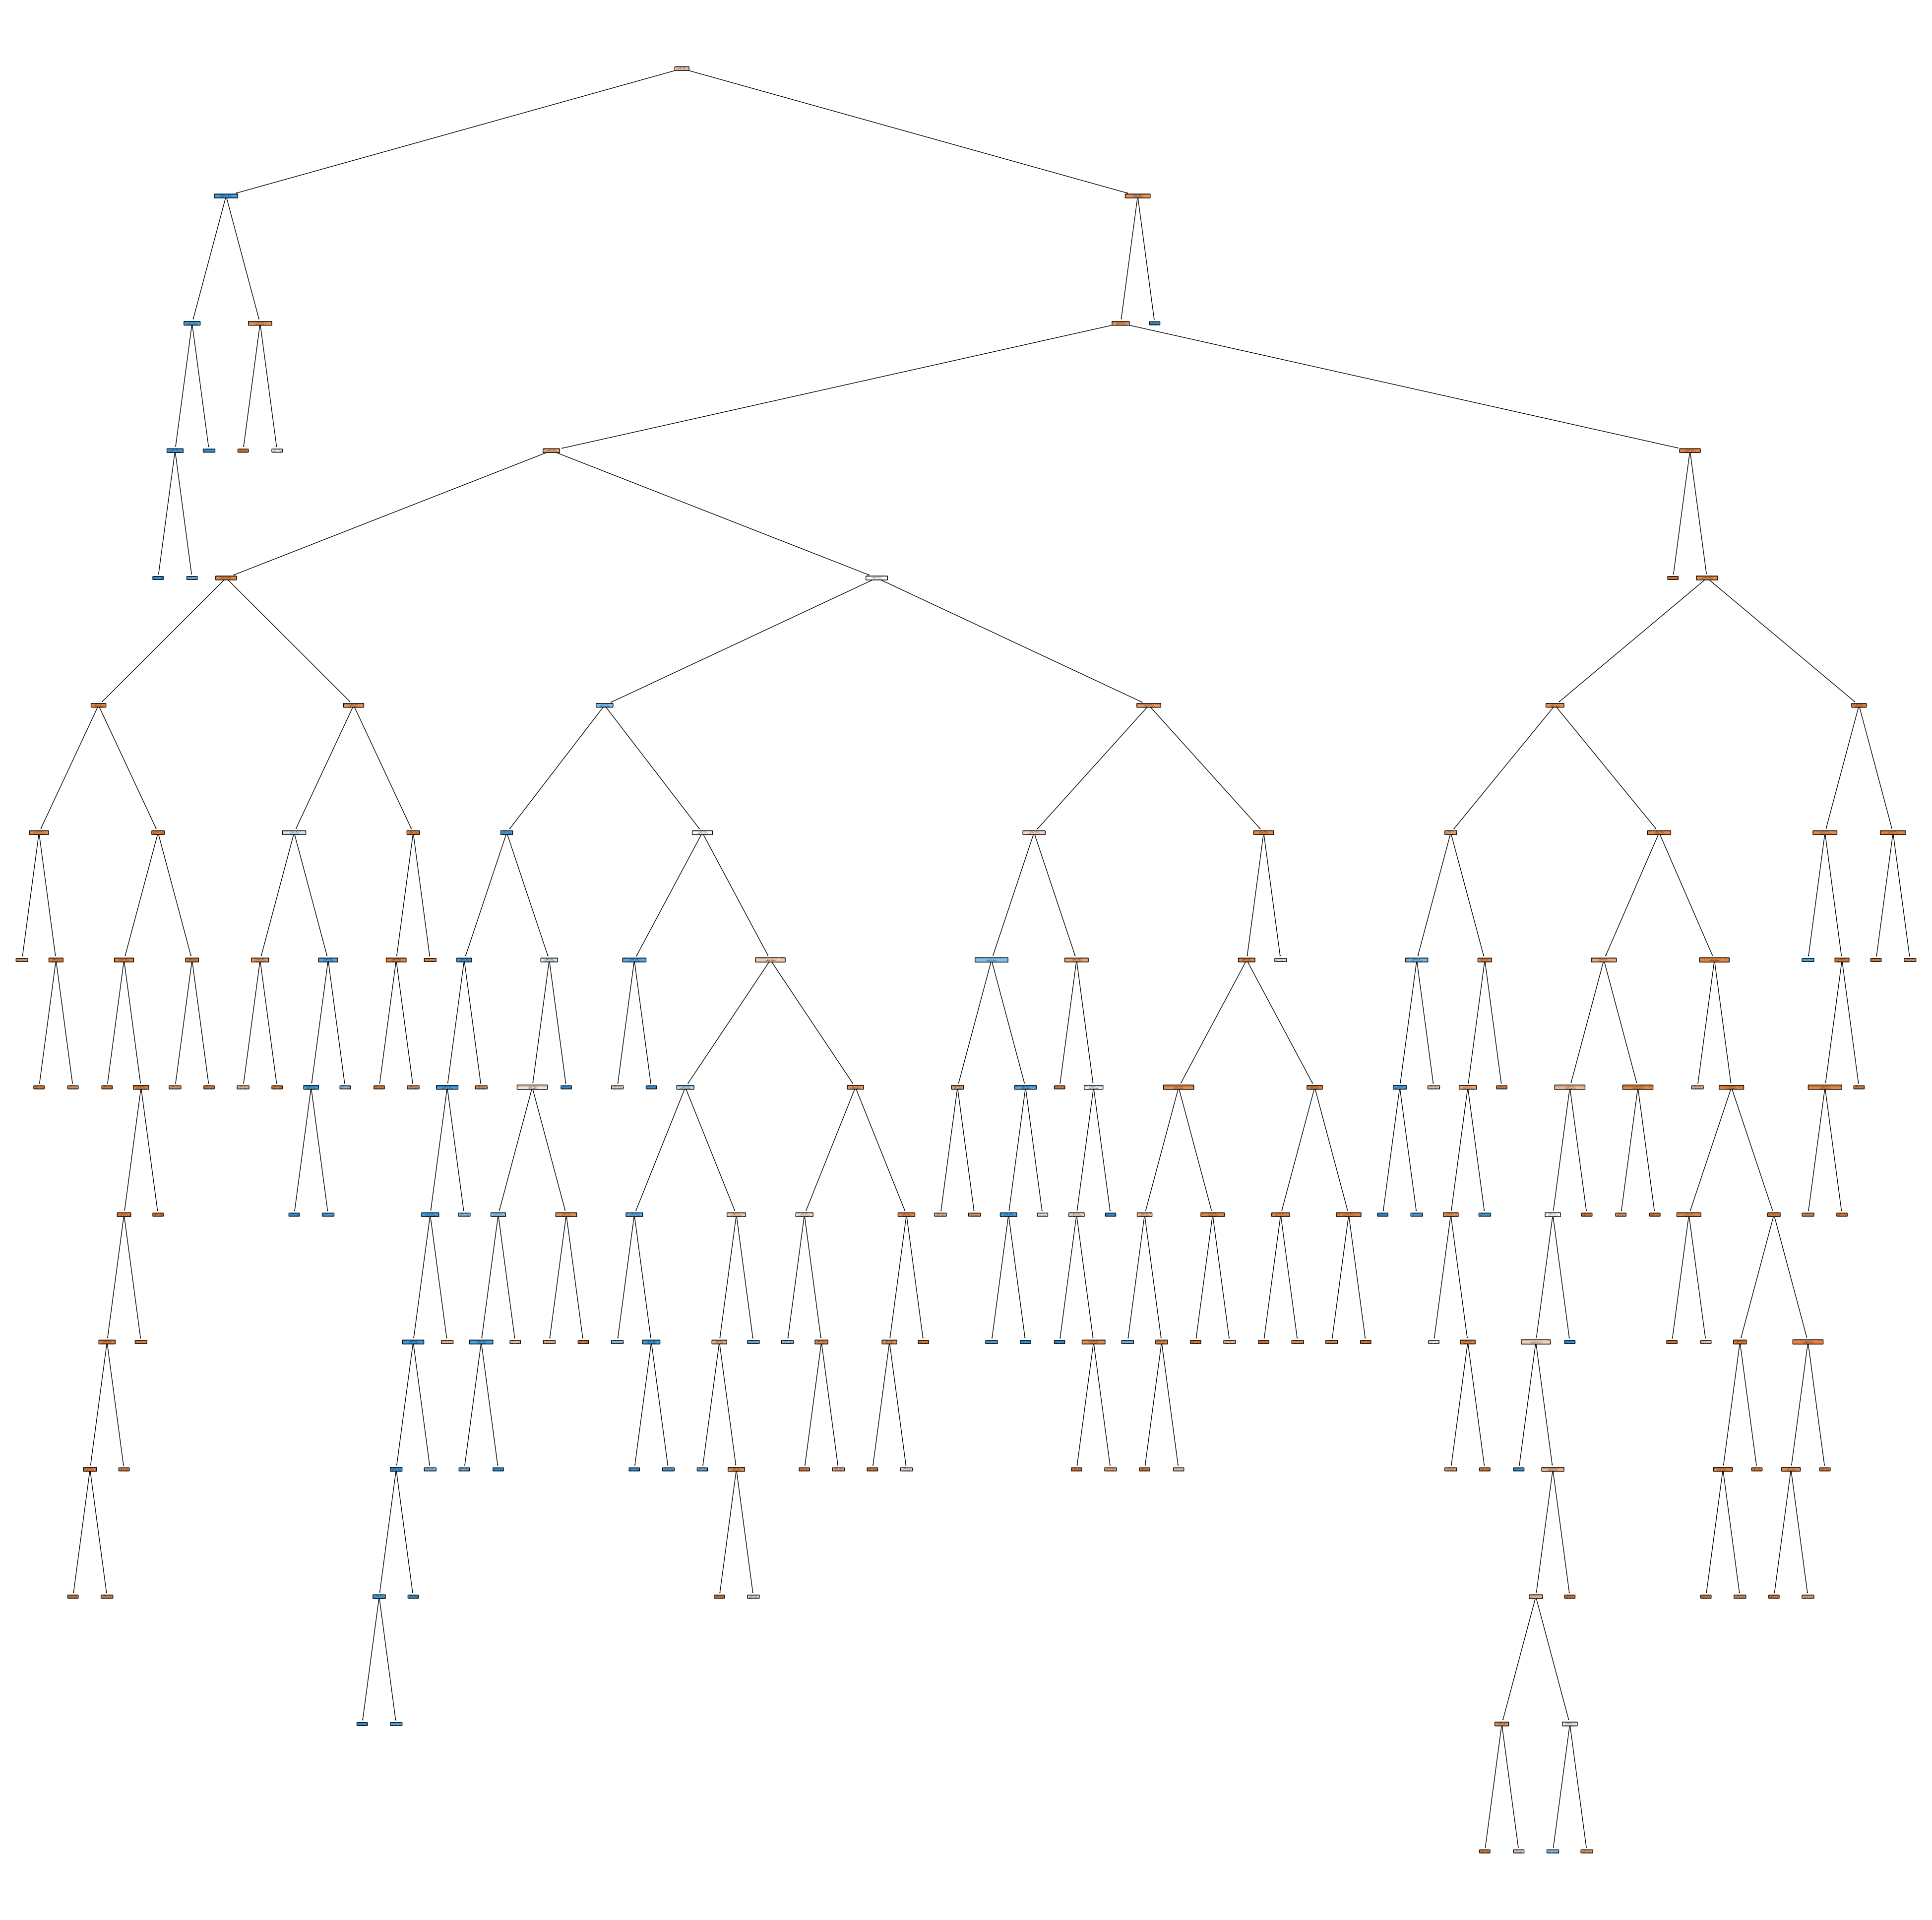

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Fraud', "No Fraud"],filled=True,proportion=True,rounded=True,precision=2)
plt.savefig("tree.eps")

In [ ]:
# sorting the date by feature importance
rf_best.feature_importances_

array([0.00668957, 0.02158341, 0.08913447, 0.01088098, 0.08906601,
       0.00299513, 0.10983469, 0.00562576, 0.0072126 , 0.08068809,
       0.07111665, 0.01584284, 0.00666548, 0.00753409, 0.        ,
       0.        , 0.        , 0.15545393, 0.01906132, 0.0771274 ,
       0.        , 0.05026813, 0.01664274, 0.02275385, 0.00308639,
       0.00296083, 0.00222819, 0.01064086, 0.00970899, 0.00638279,
       0.00467938, 0.03912544, 0.02162747, 0.01500849, 0.00160288,
       0.00200253, 0.0027703 , 0.00159939, 0.01039894])

In [ ]:
feature_imp_df = pd.DataFrame({
    "Features" : X_train.columns,
    "Importance" : rf_best.feature_importances_
})
feature_imp_df.sort_values(by="Importance",ascending=False)

,Features,Importance
17,total transactions (including tnx to create co...,0.155454
6,Unique Received From Addresses,0.109835
2,Time Diff between first and last (Mins),0.089134
4,Received Tnx,0.089066
9,max value received,0.080688
19,total ether received,0.077127
10,avg val received,0.071117
21,total ether balance,0.050268
31,ERC20 min val rec,0.039125
23,ERC20 total Ether received,0.022754
